In [28]:
import numpy as np
import matplotlib.pyplot as plt

import torch
from torch.utils.data import DataLoader
from torch import _nnpack_available

from torchvision import datasets
from torchvision.transforms import ToTensor

In [29]:
training_data = datasets.FashionMNIST(
    root = 'data', train = True, download = True, transform = ToTensor()
)

In [30]:
test_data = datasets.FashionMNIST(
    root = 'data', train=False, download=True, transform=ToTensor()
)

In [31]:
train_dataloader = DataLoader(training_data, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=64, shuffle=True)

In [32]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cpu'

In [33]:
training_data

Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [34]:
test_data

Dataset FashionMNIST
    Number of datapoints: 10000
    Root location: data
    Split: Test
    StandardTransform
Transform: ToTensor()

In [47]:
train_features, train_labels = next(iter(train_dataloader))

In [48]:
train_features.size()

torch.Size([64, 1, 28, 28])

In [63]:
training_data[0]

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

label=9


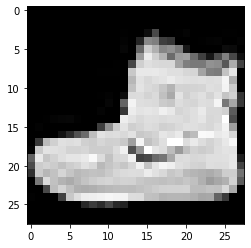

In [56]:
img, label = training_data[0]
print(f'label={label}')
plt.imshow(img.squeeze(), cmap='gray')

In [65]:
labels_map = {0:'ts', 1:'tr', 2:'pu', 3:'dr', 4:'co', 5:'sa', 6:'sh', 7:'sn', 8:'ba', 9:'an'}

In [67]:
labels_map[2]

'pu'